In [1]:
from shapely.geometry import Point, Polygon
from shapely import wkt
import pandas as pd
import simplekml
import ogr
from shapely.wkb import loads
import matplotlib.pyplot as plt

In [2]:
#Read CSV
df= pd.read_csv ('Traffic_Volumes_for_2018.csv')
df['index'] = df.set_index
df.columns

#Create the volume and Name lists
name=list(df['SECNAME'])
volume=list(df['VOLUME'])

In [3]:
# Convert to WKT Format
Lines=df['multilinestring'].apply(wkt.loads)

In [ ]:
# Traffic Distribution
df['VOLUME'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')

In [ ]:
# create the kml file
kml = simplekml.Kml(open=1)
pfol = kml.newfolder(name="Roads")

# Create CSV File out of KMZ files

In [ ]:
# consider there is only one layer available, which is always the case in a shapefile
# mind, this scripts only works with WGS, if desired a reprojection can be done


f=0
for element in Lines:
    geom = element
    arrcoords = element.to_wkt()
    #Creating  the kml Lines
    pol = pfol.newlinestring(name=name[f])
    #Creates the Style
    pol.style.linestyle.width = volume[f]/10000
    pol.visibility = 1
    #Color
    if volume[f]>100000:
        pol.style.linestyle.color='ffff0000'
    elif (100000>=volume[f]) and (volume[f]>50000):
        pol.style.linestyle.color='ff800080'
    elif (50000>=volume[f]) and (volume[f]>25000):
        pol.style.linestyle.color='ff00ff00'
    #pol.style.linestyle.Color.rgb(0, 0, 255)
    #pol.altitudemode = 'clampToGround'
    pol.extrude = 1
    #pol.outerboundaryis = ([(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x1,y1)])
    coords = arrcoords.replace('LINESTRING','').replace('(','').replace(')','')
    coords = coords.replace('MULTI','')
    coords = coords.split(',')
    asize = 100
    pol.coords = ([(float(coords[j].split()[0]),float(coords[j].split()[1]),asize) for j in range(len(coords))])
    f+=1 

openShape = None
layers = None
 
#save the kml
kml.save(r'traffic18.kml')

In [39]:
# El color Azull se escribe Asi 59acff en hexagesimal

Red – ff0000ff
Yellow – ff00ffff
Blue – ffff0000
Green – ff00ff00
Purple – ff800080
Orange – ff0080ff
Brown – ff336699
Pink – ffff00ff

# El color Azull se escribe Asi 59acff en hexagesimal

# Google lo agarra 'ffac59'

# La opacidad la dan los primero numeros '99ffac59' en este caso 99

#ejemplo Numero 2 el color 'A2627A'
#Traduce '997a62a2' , el 99 da 60% de opacidad


SyntaxError: invalid character in identifier (<ipython-input-39-fb43f083e11f>, line 1)

In [46]:
#Creating Polygon With Height for income
#read CSV

#The one with the Incomes
df1= pd.read_excel('Household_Income_by_community.xlsx', sheet_name='Househol_Income_by_community')
#The one with the boundaries that actually work. if polygons are too big csvs have trouble reading them.
df2= pd.read_csv('Community_Boundaries_layer (4).csv')

# Merged Dataframe
merged_inner = pd.merge(left=df1, right=df2, left_on='NAME', right_on='NAME')


Index(['the_geom_x', 'CLASS_x', 'CLASS_CODE_x', 'COMM_CODE_x', 'NAME',
       'SECTOR_x', 'SRG_x', 'COMM_STRUCTURE_x', 'community',
       'Average Household Income Before Taxes',
       'Median Household Income Before Taxes',
       'Average Household Income After Taxes',
       'Median Household Income After Taxes', 'Similarity', 'the_geom_y',
       'CLASS_y', 'CLASS_CODE_y', 'COMM_CODE_y', 'SECTOR_y', 'SRG_y',
       'COMM_STRUCTURE_y'],
      dtype='object')

In [53]:
#Selecting Relevant columns
final = merged_inner[['NAME','the_geom_y','CLASS_x','CLASS_CODE_x','Average Household Income Before Taxes','Median Household Income Before Taxes','Average Household Income After Taxes',]]
final.columns

Index(['NAME', 'the_geom_y', 'CLASS_x', 'CLASS_CODE_x',
       'Average Household Income Before Taxes',
       'Median Household Income Before Taxes',
       'Average Household Income After Taxes'],
      dtype='object')

In [54]:
#Create the income and Name lists
name=list(final['NAME'])
income=list(final['Average Household Income After Taxes'])

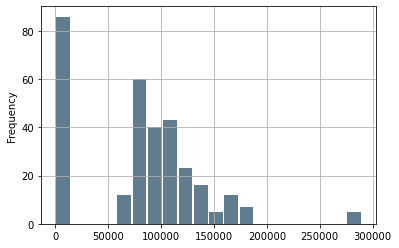

In [55]:
# Traffic Distribution
final['Average Household Income After Taxes'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')

In [56]:
# Convert to WKT Format
Polygon=final['the_geom_y'].apply(wkt.loads)
Polygon

0      POLYGON ((-114.22789207041 51.098837217909, -1...
1      POLYGON ((-114.038291510513 51.058515245307, -...
2      POLYGON ((-114.143597981417 51.102049647243, -...
3      POLYGON ((-114.140561015713 51.022621622291, -...
4      POLYGON ((-114.128994616828 51.085431257414, -...
                             ...                        
304    POLYGON ((-113.973085944855 51.172498840563, -...
305    POLYGON ((-114.060116930634 51.051542666496, -...
306    POLYGON ((-113.990670308374 51.154312897175, -...
307    POLYGON ((-114.116577134969 50.892143346321, -...
308    POLYGON ((-113.91839732026 51.176069026251, -1...
Name: the_geom_y, Length: 309, dtype: object

In [85]:
# create the kml file
kml = simplekml.Kml(open=1)
pfol = kml.newfolder(name="Incomes")


In [86]:
# consider there is only one layer available, which is always the case in a shapefile
# mind, this scripts only works with WGS, if desired a reprojection can be done


f=0
for element in Polygon:
    geom = element
    arrcoords = element.to_wkt()
    # the part that creates the kml
    pol = pfol.newpolygon(name=name[f])
    pol.visibility = 1
    #Color
    if income[f]>200000:
        pol.style.polystyle.color= simplekml.Color.rgb(140, 45, 4,150)
    elif (200000>=income[f]) and (income[f]>175000):
        pol.style.polystyle.color=simplekml.Color.rgb(204, 76, 2,150)
    elif (175000>=income[f]) and (income[f]>150000):
        pol.style.polystyle.color=simplekml.Color.rgb(236, 112, 20,150)
    elif (150000>=income[f]) and (income[f]>125000):
        pol.style.polystyle.color=simplekml.Color.rgb(254,153, 41,150)    
    elif (125000>=income[f]) and (income[f]>100000):
        pol.style.polystyle.color=simplekml.Color.rgb(254, 196, 79,150)
    elif (100000>=income[f]) and (income[f]>75000):
        pol.style.polystyle.color=simplekml.Color.rgb(254, 227, 145,150)
    elif (75000>=income[f]) and (income[f]>50000):
        pol.style.polystyle.color=simplekml.Color.rgb(255, 247,188,150)
    else:
        pol.style.polystyle.color='325a00'
    pol.altitudemode = 'clampToGround'
    pol.extrude = 1
    #pol.outerboundaryis = ([(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x1,y1)])
    coords = arrcoords.replace('POLYGON','').replace('(','').replace(')','')
    coords = coords.replace('MULTI','')
    coords = coords.split(',')
    asize = 1
    pol.outerboundaryis = ([(float(coords[j].split()[0]),float(coords[j].split()[1]),asize) for j in range(len(coords))])
    f+=1 
 
openShape = None
layers = None
 
# save the kml
kml.save(r'Income_per_community.kml')


Index(['Ward',
       'Total - Household total income groups in 2015 for private households - 25% sample data',
       'Under $20,000', '$20,000 to $39,999', '$40,000 to $59,999',
       '$60,000 to $79,999', '$80,000 to $99,999', '$100,000 to $124,999',
       '$125,000 to $149,999', '$150,000 to $199,999', '$200,000 and over',
       'polygon', 'people'],
      dtype='object')

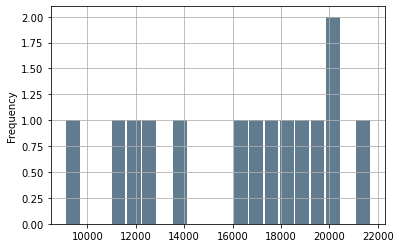

In [141]:
#Income by ward ML

#The one with the Incomes
df= pd.read_csv('Income_Ward_Calgary.csv')
#People with over 100,000 in income
df['$100,000 to $124,999'] = df['$100,000 to $124,999'].str.replace(r',', '').astype(int)
df['$125,000 to $149,999'] = df['$125,000 to $149,999'].str.replace(r',', '').astype(int)
df['$150,000 to $199,999'] = df['$150,000 to $199,999'].str.replace(r',', '').astype(int)
df['$200,000 and over'] = df['$200,000 and over'].str.replace(r',', '').astype(int)

#Creating column
df['people']=df['$100,000 to $124,999']+df['$125,000 to $149,999']+df['$150,000 to $199,999']+df['$200,000 and over']

#Create the income and Name lists
name=list(df['Ward'])
income=list(df['people'])

#histogram
df['people'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
df.columns


In [ ]:
# consider there is only one layer available, which is always the case in a shapefile
# mind, this scripts only works with WGS, if desired a reprojection can be done
# create the kml file
kml = simplekml.Kml(open=1)
pfol = kml.newfolder(name="Incomes")

#Create the polygons from the csv
# Convert to WKT Format
Polygon=df['polygon'].apply(wkt.loads)
Polygon

#Loop

f=0
for element in Polygon:
    geom = element
    arrcoords = element.to_wkt()
    # the part that creates the kml
    pol = pfol.newpolygon(name=name[f])
    pol.visibility = 1
    #Color
    #if income[f]>200000:
    #    pol.style.polystyle.color= simplekml.Color.rgb(140, 45, 4,150)
    #elif (200000>=income[f]) and (income[f]>175000):
    #    pol.style.polystyle.color=simplekml.Color.rgb(204, 76, 2,150)
    #elif (175000>=income[f]) and (income[f]>150000):
    #    pol.style.polystyle.color=simplekml.Color.rgb(236, 112, 20,150)
    #elif (150000>=income[f]) and (income[f]>125000):
    #    pol.style.polystyle.color=simplekml.Color.rgb(254,153, 41,150)    
    #elif (125000>=income[f]) and (income[f]>100000):
    #    pol.style.polystyle.color=simplekml.Color.rgb(254, 196, 79,150)
    #elif (100000>=income[f]) and (income[f]>75000):
    #    pol.style.polystyle.color=simplekml.Color.rgb(254, 227, 145,150)
    #elif (75000>=income[f]) and (income[f]>50000):
    #    pol.style.polystyle.color=simplekml.Color.rgb(255, 247,188,150)
    #else:
    #    pol.style.polystyle.color='325a00'
    pol.altitudemode = 'relativeToGround'
    pol.extrude = 1
    #pol.outerboundaryis = ([(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x1,y1)])
    coords = arrcoords.replace('POLYGON','').replace('(','').replace(')','')
    coords = coords.replace('MULTI','')
    coords = coords.split(',')
    altitude_size = income[f]/100
    pol.outerboundaryis = ([(float(coords[j].split()[0]),float(coords[j].split()[1]),altitude_size) for j in range(len(coords))])
    pol.innerboundaryis=([(float(coords[j].split()[0]),float(coords[j].split()[1]),altitude_size) for j in range(len(coords))])
    f+=1 
 
openShape = None
layers = None
 
# save the kml
kml.save(r'People_per_Ward.kml')

